In [2]:
import pandas as pd 
import os
import glob 
csv_dir = "/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/"

csv_paths = glob.glob(csv_dir + "*/clustering_results.csv")
print(len(csv_paths))
print(csv_paths)

106
['/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0003323/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0021179/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0019980/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0005168/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0006365/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0014395/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0006433/clustering_results.csv', '/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/clustering-07-19-2024-01-46-55/P0001

In [8]:
pd.read_csv(csv_paths[0], index_col = 0)['tsne_best_perplexity'][0]

26

In [9]:
best_perplexities = [pd.read_csv(i, index_col = 0)['tsne_best_perplexity'][0] for i in csv_paths]

In [11]:
import numpy as np
np.mean(best_perplexities)

17.471698113207548

In [12]:
np.median(best_perplexities)

17.0

<AxesSubplot:ylabel='Count'>

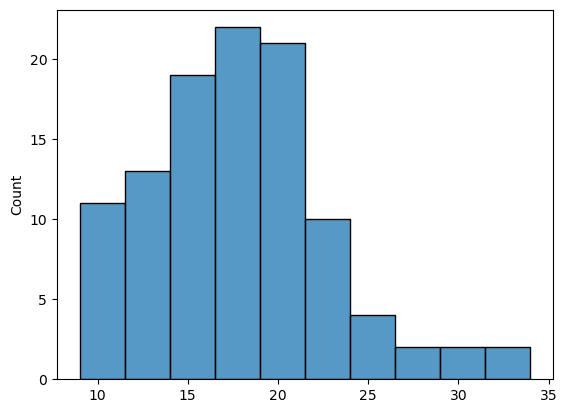

In [10]:
import seaborn as sns
sns.histplot(best_perplexities)

In [5]:
best_perplexities[:4]

NameError: name 'best_perplexities' is not defined

In [1]:
from deprecated_and_archived.image_clustering import CustomClustering

clusterer = CustomClustering(verbose = True)
clusterer.get_all_subj_metadata()
subj_data = clusterer.get_subject_data(mi_id="P0012750")
clustering_result_dict = clusterer.try_all_clustering_methods(subj_data)
clusterer.save_clustering_results(clustering_result_dict, "/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/temp_test")

Clustering starting...
get_span_tree_connected_components_clusterings
span_tree clustering took 8.516882615163922 seconds
get_connected_components_clusterings
connected components clustering took 945.3083677683026 seconds
get_louvain_clusterings
louvain clustering took 0.10148952715098858 seconds
get_hierarchical_clusterings
hierarchical clustering took 0.2674291767179966 seconds
get_k_means_clusterings
k_means clustering took 10.487723793834448 seconds
get_affinity_propagation_clusterings
affinity_propagation clustering took 0.07907208055257797 seconds
get_agglomerative_clusterings
agglomerative clustering took 2.9798896554857492 seconds
get_spectral_embedding_based_clusterings


/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  est = KMeans(
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  est = KMeans(
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  est = KMeans(
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/skl

Spectral clustering took 15.783076208084822 seconds
get_isomap_embeddings
get_mds_embeddings
get_tsne_embeddings


: 

In [ ]:
from deprecated_and_archived.image_clustering import CustomClustering

clusterer = CustomClustering()
clusterer.get_all_subj_metadata()
subj_data = clusterer.get_subject_data(mi_id="P0018571")
clustering_result_dict = clusterer.try_all_clustering_methods(subj_data)
clusterer.save_clustering_results(clustering_result_dict, "/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results/temp_test")

In [15]:
import numpy as np
all_silhouette_scores = [
    clustering_result_dict.get("span_tree_connected_components_best_silhouette_score"), 
    clustering_result_dict.get("connected_components_best_silhouette_score"), 
    clustering_result_dict.get("louvain_best_silhouette_score"), 
    clustering_result_dict.get("hierarchical_best_silhouette_score"), 
    clustering_result_dict.get("spectral_clustering_graph_based_best_silhouette_score"), 
    clustering_result_dict.get("kmeans_best_silhouette_score"), 
    clustering_result_dict.get("hdbscan_best_silhouette_score"), 
    clustering_result_dict.get("affinity_propagation_best_silhouette_score"), 
    clustering_result_dict.get("agglomerative_best_silhouette_score"), 
    clustering_result_dict.get("spectral_embedding_based_best_silhouette_score"), 
]
all_clustering_algos = [
    "span_tree_connected_components",
    "connected_components",
    "louvain",
    "hierarchical",
    "spectral_clustering_graph_based",
    "kmeans",
    "hdbscan",
    "affinity_propagation",
    "agglomerative",
    "spectral_embedding_based",
]

assert(len(all_clustering_algos) == len(all_silhouette_scores))

clustering_algo_dict = {all_clustering_algos[i]: all_silhouette_scores[i]
                        for i in range(len(all_clustering_algos))}

clustering_algo_dict = {key: val for key, val in clustering_algo_dict.items() if val is not None and isinstance(val, (int, float, np.floating, np.integer)) }
 
best_clustering_algorithm = max(clustering_algo_dict, key=clustering_algo_dict.get)
best_silhouette_score = clustering_algo_dict.get(best_clustering_algorithm)
print(f"Best clustering algorithm {best_clustering_algorithm}, best silhouette score {best_silhouette_score}")

Best clustering algorithm agglomerative, best silhouette score 0.1328723281621933


<AxesSubplot:>

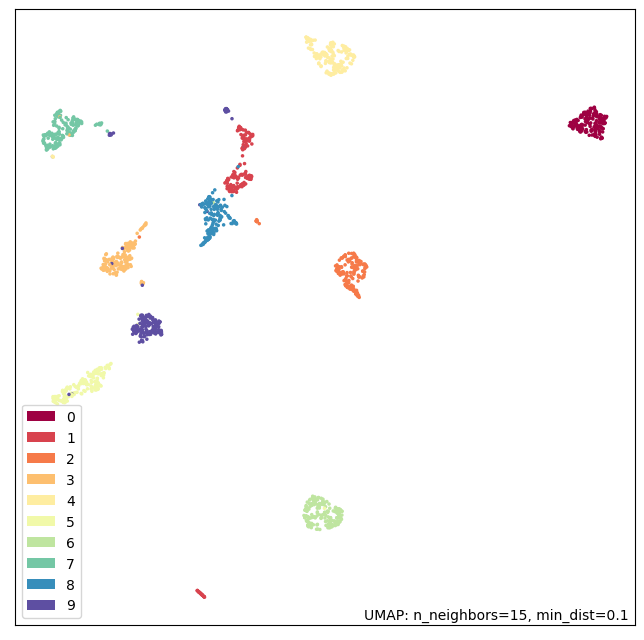

In [1]:
import umap
import umap.plot
from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

<AxesSubplot:>

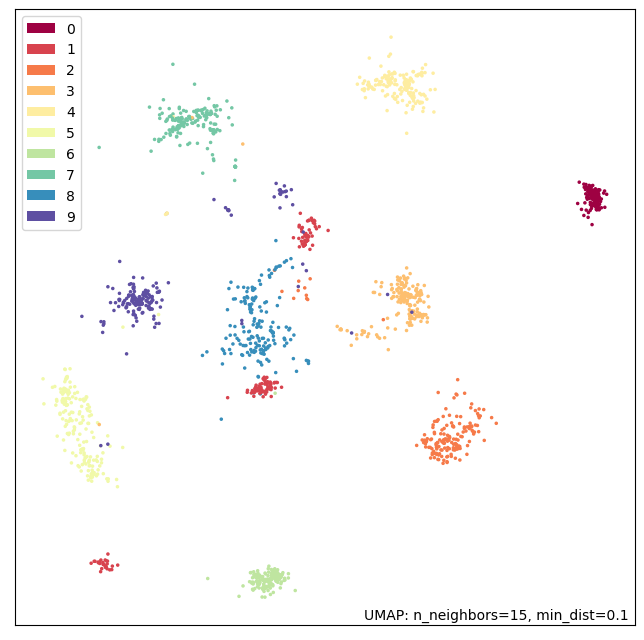

In [3]:
densMapper = umap.UMAP(densmap=True).fit(digits.data)
umap.plot.points(densMapper, labels=digits.target)

In [10]:
import pandas as pd
pd.DataFrame(umap.UMAP(densmap=True).fit_transform(digits.data))

,0,1
0,17.550028,8.483167
1,1.116805,11.035866
2,5.315558,7.785456
3,-6.229557,5.453975
4,5.679886,19.377132
...,...,...
1792,-2.790981,1.427423
1793,17.660730,9.082964
1794,0.646535,9.325048
1795,-2.449568,2.357246


In [11]:
import pandas as pd
pd.DataFrame(umap.UMAP(densmap=False).fit_transform(digits.data))

,0,1
0,14.763286,8.952041
1,-7.580967,10.916119
2,-6.720291,9.052320
3,-0.686033,10.071706
4,7.603405,16.397457
...,...,...
1792,-1.047334,5.454546
1793,15.701723,9.274252
1794,-5.907256,9.833933
1795,-1.566869,5.912508


In [1]:
from deprecated_and_archived.image_clustering import CustomClustering
clusterer = CustomClustering(verbose = True)
clusterer.all_subj_clustering_pipeline(result_parent_dir="/home/liuusa_tw/twbabd_image_xai_20062024/custom_lime_results")

  0%|          | 0/135 [00:00<?, ?it/s]

0 P0012750
Clustering starting...
get_span_tree_connected_components_clusterings
get_connected_components_clusterings
get_louvain_clusterings
get_hierarchical_clusterings
get_k_means_clusterings
get_hdbscan_clusterings
get_affinity_propagation_clusterings
get_agglomerative_clusterings
get_spectral_embedding_based_clusterings


/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/tjyen/anaconda3/envs/xai/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(es

get_isomap_embeddings
get_mds_embeddings
get_tsne_embeddings


In [ ]:
import tsnecuda
from tsnecuda import TSNE as TSNE_GPU
tsnecuda.test()
N = len(y_train)
learning_rate = max(N.shape / early_exaggeration / 4, 50)
early_exaggeration = 12 
X_embedded_gpu = TSNE_GPU(n_components=2, learning_rate=learning_rate, perplexity=25).fit_transform(train_X)

In [2]:
clusterer.

AttributeError: 'CustomClustering' object has no attribute 'all_subj_best_results_df'

In [16]:
job = {'id':1234, 'age':17, 'name':'dev'}
{key: val for key, val in job.items() if val is not None and isinstance(val, (int, float, )) }


{'id': 1234, 'age': 17}

In [ ]:
all_silhouette_scores = [
    clustering_result_dict.get("span_tree_connected_components_best_silhouette_score"), 
    clustering_result_dict.get("connected_components_best_silhouette_score"), 
    clustering_result_dict.get("louvain_best_silhouette_score"), 
    clustering_result_dict.get("hierarchical_best_silhouette_score"), 
    clustering_result_dict.get("spectral_clustering_graph_based_best_silhouette_score"), 
    clustering_result_dict.get("kmeans_best_silhouette_score"), 
    clustering_result_dict.get("hdbscan_best_silhouette_score"), 
    clustering_result_dict.get("affinity_propagation_best_silhouette_score"), 
    clustering_result_dict.get("agglomerative_best_silhouette_score"), 
    clustering_result_dict.get("spectral_embedding_based_best_silhouette_score"), 
]
all_clustering_algos = [
    "span_tree_connected_components",
    "connected_components",
    "louvain",
    "hierarchical",
    "spectral_clustering_graph_based",
    "kmeans",
    "hdbscan",
    "affinity_propagation",
    "agglomerative",
    "spectral_embedding_based",
]

assert(len(all_clustering_algos) == len(all_silhouette_scores))

clustering_algo_dict = {all_clustering_algos[i]: all_silhouette_scores[i]
                        for i in range(len(all_clustering_algos))}
max(clustering_algo_dict, key=clustering_algo_dict.get)

'agglomerative'

In [ ]:
clustering_algo_dict

{'span_tree_connected_components': 0.11930023,
 'connected_components': -100,
 'louvain': 0.10595227,
 'hierarchical': -100,
 'spectral_clustering_graph_based': -100,
 'kmeans': 0.12527147,
 'hdbscan': 0.0485693,
 'affinity_propagation': 0.10431463,
 'agglomerative': 0.13453694,
 'spectral_embedding_based': 0.1188258}

In [ ]:
clustering_result_dict

{'best_silhouette_score': 0.13453694,
 'best_clustering_algorithm': 'agglomerative',
 'span_tree_connected_components_clusterings': array([0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 3, 3, 3, 3, 4, 5, 4, 3, 3, 3,
        3, 6, 3], dtype=int32),
 'span_tree_connected_components_n_clusters': 7,
 'span_tree_connected_components_best_silhouette_score': 0.11930023,
 'connected_components_clusterings': None,
 'connected_components_best_threshold': None,
 'connected_components_best_metric': None,
 'connected_components_best_silhouette_score': -100,
 'louvain_clusterings': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  2,
  2,
  3,
  3,
  0,
  4,
  4,
  4,
  4,
  2,
  2,
  2,
  4,
  4,
  4,
  4,
  4,
  4],
 'louvain_best_silhouette_score': 0.10595227,
 'hierarchical_clusterings': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  3,
  4,
  5,
  2,
  2,
  2,
  2,
  6,
  2],
 'hierarchical_best_metric': 'cosine',
 'hierarchical_best_linkage_type': 'complete',
 'hierarchical_best_silho

In [ ]:
clustering_result_dict["subj_result_df"]

,mi_id,img_id,best_clustering_algorithm,best_silhouette_score,worst_silhouette_score,best_clustering_labels,TSNE1,TSNE2,TSNE1,TSNE2,...,hdbscan_best_silhouette_score,hdbscan_best_cluster_selection_method,affinity_propagation_best_silhouette_score,agglomerative_best_n_clusters,agglomerative_best_silhouette_score,spectral_embedding_based_best_affinity_method,spectral_embedding_based_best_n_clusters,spectral_embedding_based_best_silhouette_score,tsne_best_perplexity,tsne_best_kl_divergence
0,P0012750,IMG0001,agglomerative,0.134537,-100,None,-1.906304,1.680923,-1.906304,1.680923,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
1,P0012750,IMG0002,agglomerative,0.134537,-100,None,-2.314273,1.685107,-2.314273,1.685107,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
2,P0012750,IMG0003,agglomerative,0.134537,-100,None,-2.376019,1.653714,-2.376019,1.653714,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
3,P0012750,IMG0004,agglomerative,0.134537,-100,None,-1.500333,1.834682,-1.500333,1.834682,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
4,P0012750,IMG0005,agglomerative,0.134537,-100,None,-1.919655,1.416076,-1.919655,1.416076,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
5,P0012750,IMG0006,agglomerative,0.134537,-100,None,-2.041449,1.352836,-2.041449,1.352836,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
6,P0012750,IMG0007,agglomerative,0.134537,-100,None,-1.448904,1.815511,-1.448904,1.815511,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
7,P0012750,IMG0008,agglomerative,0.134537,-100,None,-1.094790,1.482000,-1.094790,1.482000,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
8,P0012750,IMG0009,agglomerative,0.134537,-100,None,-0.966149,1.396337,-0.966149,1.396337,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317
9,P0012750,IMG0010,agglomerative,0.134537,-100,None,-1.355689,1.381541,-1.355689,1.381541,...,0.048569,eom,0.104315,11,0.134537,nearest_neighbors,4,0.118826,21,0.034317


In [ ]:
from deprecated_and_archived.image_clustering import CustomClustering

clusterer = CustomClustering()
subj_data = clusterer.get_subject_data(mi_id="P0012750")

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

NeighborhoodComponentsAnalysis(
            n_components=2,
            init = "pca",
            max_iter = 1000,
            ).fit_transform(subj_data.get("subj_img_embedding"))

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
print(subj_data.get("subj_img_embedding").shape)

torch.Size([25, 1024])
